Class labels: [0 1 2]


C:\Users\23665\AppData\Local\Temp\ipykernel_22488\20467793.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


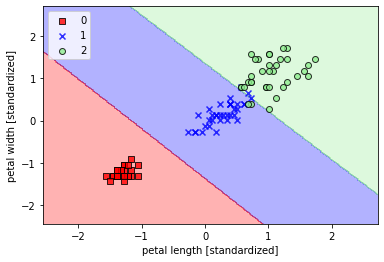

C:\Users\23665\AppData\Local\Temp\ipykernel_22488\20467793.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


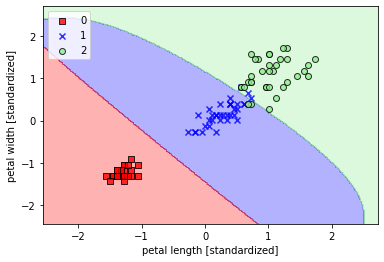

[LibSVM]

C:\Users\23665\AppData\Local\Temp\ipykernel_22488\20467793.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


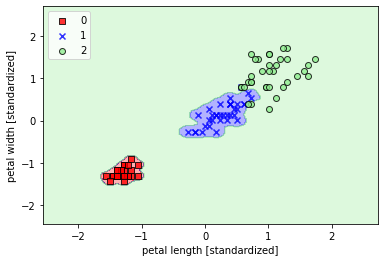

In [1]:
# 引入数据
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print("Class labels:",np.unique(y))  #打印分类类别的种类


# 切分训练数据和测试数据
from sklearn.model_selection import train_test_split
## 30%测试数据，70%训练数据，stratify=y表示训练数据和测试数据具有相同的类别比例
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)



from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
## 估算训练数据中的mu和sigma
sc.fit(X_train)
## 使用训练数据中的mu和sigma对数据进行标准化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



## 画出决策边界图(只有在2个特征才能画出来)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

def plot_decision_region(X,y,classifier,resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    # plot class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                   y = X[y==cl,1],
                   alpha=0.8,
                   c=colors[idx],
                   marker = markers[idx],
                   label=cl,
                   edgecolors='black')
        

## 线性支持向量机
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_region(X_train_std,y_train,classifier=svm,resolution=0.02)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
        


## 使用核函数对非线性分类问题建模(gamma=0.20)
svm = SVC(kernel='rbf',random_state=1,gamma=0.20,C=1.0)    ##较小的gamma有较松的决策边界
svm.fit(X_train_std,y_train)
plot_decision_region(X_train_std,y_train,classifier=svm,resolution=0.02)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()



## 使用核函数对非线性分类问题建模(gamma=100)
svm = SVC(kernel='rbf',random_state=1,gamma=100.0,C=1.0,verbose=1)   
svm.fit(X_train_std,y_train)
plot_decision_region(X_train_std,y_train,classifier=svm,resolution=0.02)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
